# Dave's Data Science Project, Spring 2019

  Obisety is a huge problem in America and leads to diseases that kill Americans. Many people estimate that the percentage of people obese is over 30% in America. America is above the world average and is first of the major world powers. Many factors have been linked to obesity including portion sizes, wealth, laziness, more inactive jobs, cost of healthy food and many more. For my project I wanted to put some of these factors to the test against obesity. Instead of doing the whole country I wanted to focus on one part or region to see if any specific factors effected obesity more since that seems to be less common in obesity research. I grew up in New Mexico and saw that many of the states around it had a wide range of obesity from being well above to well below the national average. Those two factors made me decide to focus on the south west region. Specifically the counties in Oklahoma, Kansas, Nevada, Wyoming, Colorado and Utah. I decided to exclude California do to its massive size and used Texas as a boarder to the more south east cities. 
	I collected my data using policy map through Tufts University. Policy map is a website that provides different sets of public data mostly from censuses in America to provide data for scientific and educational purposes. Policy map is a business it makes data interactive and people subscribe to it like universities and research labs.   
    The three factors I will be comparing to percent of the population that is obese are percent of adults that engage in binge drinking, percent of adults reporting to be physically inactive and rate of fast food restaurants. Drinking, physical inactivity and fast food are all well known as being healthy. (ADD MORE LATER)

## Files Included
The included packages that help with creating and visualizing my analysis.

In [1]:
from io_hw import io_hw
import pandas as pd
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import numpy as np
import math

## Initial Data Parsing
Here, the io_hw.p file is used, and the desired fields are then extracted from the dataframe.

In [2]:
def read_data():
	df, head_df = io_hw('data.csv')
	obese = df.iloc[:, 3].tolist()
	drink = df.iloc[:, 4].tolist()
	inactive = df.iloc[:, 5].tolist()
	fastfood = df.iloc[:, 6].tolist()
	return obese, drink, inactive, fastfood
tempdf, temphead = io_hw('data.csv')
tempdf

,County,FIPS Code,Formatted FIPS,Estimated percent of adults reporting to be obese (a body mass i,Estimated percent of adults reporting to engage in binge drinkin,Estimated percent of adults reporting to be physically inactive,"Rate of limited-service restaurants per 100,000 people in 2016.",State
0,Osage,40113,40113,33.03,10.65,38.99,41.62,Oklahoma
1,Texas,40139,40139,32.29,12.22,38.48,37.06,Oklahoma
2,Cimarron,40025,40025,31.30,11.44,38.33,NaN,Oklahoma
3,Beaver,40007,40007,31.56,12.12,35.92,NaN,Oklahoma
4,McCurtain,40089,40089,32.68,11.42,39.09,42.24,Oklahoma
5,Le Flore,40079,40079,32.58,11.00,37.48,36.07,Oklahoma
6,Pushmataha,40127,40127,32.07,10.90,39.69,26.72,Oklahoma
7,Pittsburg,40121,40121,33.03,11.47,38.62,71.17,Oklahoma
8,Woods,40151,40151,30.65,12.71,34.77,99.63,Oklahoma
9,Caddo,40015,40015,31.11,11.31,38.60,33.90,Oklahoma


## Data Cleaning (removing NaN values):
NaN values can hurt the accuracy of my analysis, as well as cause problems in code, so I remove them. However, I want to use as much data as possible during each peice of analysis, and so I rerun this clean code for each y vector.

In [3]:
def clean(x_init, y_init):
	ziplist = zip(x_init, y_init)
	x_clean = [x for (x, y) in ziplist if not math.isnan(y)]
	ziplist = zip(x_init, y_init)
	y_clean = [y for (x, y) in ziplist if not math.isnan(y)]
	return x_clean, y_clean

## Creating Correlation Graphs:
These graphs display the correlation between obesity and the desired y variable. 

In [4]:
def plot(x_init, y_init, name):
    x, y = clean(x_init, y_init)
    pyplot.title(name + " vs Obesity by County in the Midwest")
    pyplot.xlabel("Obesity (%)")
    pyplot.ylabel(name + "(%)")
    curr_plot = pyplot.scatter(x, y)

## Finding Variable Correlation:

This function assists in figuring out the correlation coefficients between the two inputted variables. For this use, x_init will always be the obesity vector.

In [5]:
def correlation(x_init, y_init):
	x, y = clean(x_init, y_init)
	x_np = np.array(x)
	y_np = np.array(y)
	return np.corrcoef(x_np, y_np)[0][1]

## Plotting Figures:

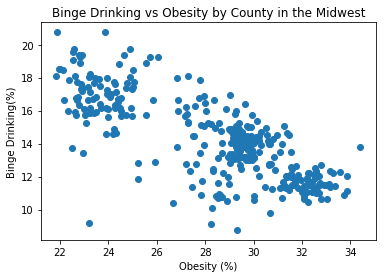

In [6]:
obese, drink, inactive, fastfood = read_data()

plot(obese, drink, "Binge Drinking")

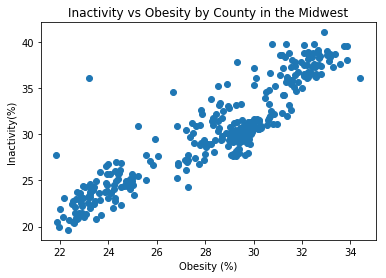

In [7]:
plot(obese, inactive, "Inactivity")

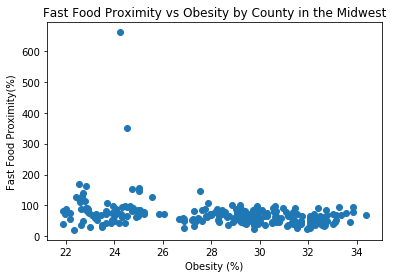

In [8]:
plot(obese, fastfood, "Fast Food Proximity")

## Correlation
This piece of code finds each of the test factors' correlation with obesity, and then prints the factor with the highest magnitude of correlation.

In [9]:
drink_corr = correlation(obese, drink)
inactive_corr = correlation(obese, inactive)
fastfood_corr = correlation(obese, fastfood)
highest_corr = max([drink_corr, inactive_corr, fastfood_corr], key=abs)
zip_corr = [("Drink Correlation", drink_corr), 
		("Inactivity Correlation", inactive_corr), 
		("Fast Food Correlation", fastfood_corr)]
highest_corr_name = [x for (x, y) in zip_corr if highest_corr==y]
print(highest_corr_name[0] + ": " + str(highest_corr))

Inactivity Correlation: 0.9113725043321461


As we can see from the (talk about correlation)

In [10]:
drink_corr

-0.7639946896218945

In [11]:
inactive_corr

0.9113725043321461

In [12]:
fastfood_corr

-0.25130366429776824

## Plotting All Correlation using Heat Map
The pyplot package is used again here to map my four initial variables against eachother in a heat map. This is useful for visualizing the correlation of each of the test variables with eachother, as well as with obesity.

In [13]:
def plot_all(obese, drink, inactive, fastfood):
	ziplist = zip(obese, drink, inactive, fastfood)
	o_clean = [x for (x, y, z, w) in ziplist if not math.isnan(w)]
	ziplist = zip(obese, drink, inactive, fastfood)
	d_clean = [y for (x, y, z, w) in ziplist if not math.isnan(w)]
	ziplist = zip(obese, drink, inactive, fastfood)
	i_clean = [z for (x, y, z, w) in ziplist if not math.isnan(w)]
	ziplist = zip(obese, drink, inactive, fastfood)
	f_clean = [w for (x, y, z, w) in ziplist if not math.isnan(w)]

	df_dict = {"Obesity": obese, "Binge Drinking": drink, "Inactivity": inactive, "Fast Food Proximity": fastfood}
	df = pd.DataFrame(df_dict)
	fig = pyplot.figure()
	ax = fig.add_subplot(111)
	cmap = cm.get_cmap('jet', 30)
	cax = ax.imshow(df.corr(), interpolation = "nearest", cmap = cmap)
	ax.grid(True)
	pyplot.title('Correlation Between Test Variables and Obesity')
	labels = ["", "Obesity", "", "Binge Drinking", "", "Inactivity", "", "Fast Food", ""]
	ax.set_xticklabels(labels)
	ax.set_yticklabels(labels)
	fig.colorbar(cax)
	pyplot.show()

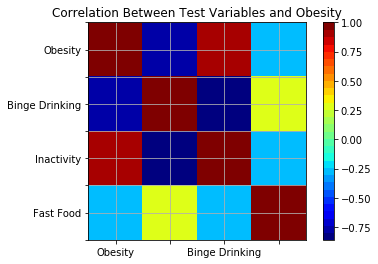

In [14]:
plot_all(obese, drink, inactive, fastfood)

## Adding in New Data
Below, new data is added in. The location stays as the same as desired, but new factors are added to see if they contribute to obesity.

In [15]:
new_df = pd.read_csv('merge dataset.csv')
new_df

,County,FIPS Code,Formatted FIPS,"Percent of workers age 30 or older, by residence, with some coll",Unnamed: 4,"Percent of workers, by residence, who earn $15,000 or less annua"
0,Osage,40113,40113,34.37,Oklahoma,20.55
1,Texas,40139,40139,30.04,Oklahoma,17.52
2,Cimarron,40025,40025,32.84,Oklahoma,22.98
3,Beaver,40007,40007,31.77,Oklahoma,19.17
4,McCurtain,40089,40089,34.07,Oklahoma,24.49
5,Le Flore,40079,40079,34.55,Oklahoma,23.51
6,Pushmataha,40127,40127,34.31,Oklahoma,25.00
7,Pittsburg,40121,40121,34.69,Oklahoma,23.03
8,Woods,40151,40151,34.08,Oklahoma,20.98
9,Caddo,40015,40015,32.15,Oklahoma,21.04


## Plotting New Data
Similarly to above, the new data is inputted into the plot function and the correlation between each new variable and obesity is shown.

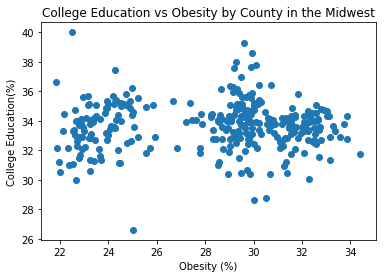

In [16]:
education = new_df.iloc[:, 3].tolist()
income = new_df.iloc[:, 5].tolist()
plot(obese, education, "College Education")

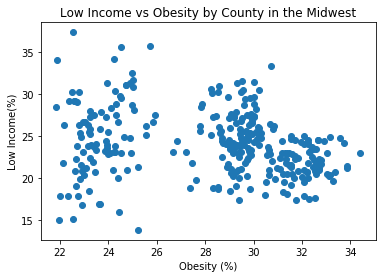

In [17]:
plot(obese, income, "Low Income")

In [21]:
education_corr = correlation(obese, education)
education_corr

0.025852785566548752

In [22]:
income_corr = correlation(obese, income)
income_corr

-0.21380757184280128